# 高精度Timestamp

libpcapでは、以下のオプションでtimestampの補正が可能になっています。

https://github.com/the-tcpdump-group/libpcap/blob/98e570c4d9708e46033a6545690ced67cca6f0cb/pcap.c#L1316-L1323

このうち、 adapter*がNICのカウンターによる補正オプションです。
該当コードは以下の通り、linuxのkernelの機能を使っています。

https://github.com/the-tcpdump-group/libpcap/blob/0134e333b94d846cb9eff6e96d07c72dc636afbf/pcap-linux.c#L4167-L4255


liunx側のtimestamp機能は以下の通りで

http://lxr.free-electrons.com/source/Documentation/networking/timestamping/timestamping.c

userlandからhw tstampつかうには、linuxの場合、setsockoptで、SOL_SOCKET, SO_TIMESTAMPをoptionで与えています。
なので、

http://lxr.free-electrons.com/source/Documentation/networking/timestamping.txt#L186


## tcpdump (10 pps)

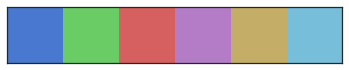

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style='white')
sns.set_context("paper", 2, {"lines.linewidth": 4})
sns.set_palette("muted")
sns.palplot(sns.color_palette("muted"))

In [138]:
data_sw10 = np.loadtxt("data/20160218/sume100ms_sw.pcap.txt", delimiter=',')
data_hw10 = np.loadtxt("data/20160218/sume100ms_hw.pcap.txt", delimiter=',')

In [139]:
# sec -> nanosec
data_sw10[:,1] *= 1000000
data_hw10[:,1] *= 1000000
print(data_sw10[:,1])

[  0.00000000e+00   9.99980000e+04   1.99997000e+05 ...,   4.99694600e+08
   4.99794598e+08   4.99894603e+08]


In [140]:
print(data_hw10)

[[  1.00000000e+00   0.00000000e+00]
 [  2.00000000e+00   1.00008000e+05]
 [  3.00000000e+00   2.00005000e+05]
 ..., 
 [  4.25600000e+03   4.25495014e+08]
 [  4.25700000e+03   4.25595009e+08]
 [  4.25800000e+03   4.25695008e+08]]


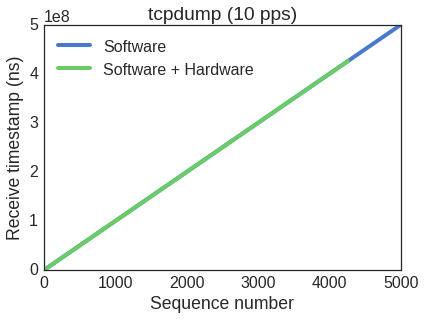

In [141]:
plt.plot(data_sw10[:,0],data_sw10[:,1])
plt.plot(data_hw10[:,0],data_hw10[:,1])
plt.legend(('Software', 'Software + Hardware'), loc='upper left')
plt.xlabel('Sequence number')
plt.ylabel('Receive timestamp (ns)')
plt.title("tcpdump (10 pps)")

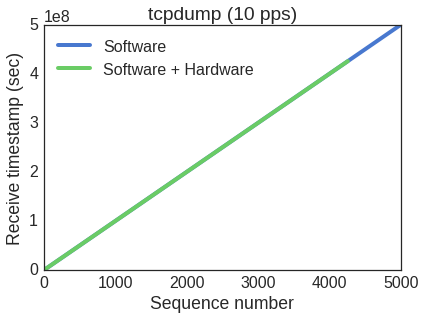

In [142]:
plt.plot(data_sw10[:,0],data_sw10[:,1])
plt.plot(data_hw10[:,0],data_hw10[:,1])
plt.legend(('Software', 'Software + Hardware'), loc='upper left')
plt.xlabel('Sequence number')
plt.ylabel('Receive timestamp (sec)')
plt.title("tcpdump (10 pps)")

(array([  6.96021368e-05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   6.96021368e-05,
          0.00000000e+00,   0.00000000e+00,   6.96021368e-05,
          1.39204274e-04,   6.96021368e-05,   6.96021368e-05,
          6.96021368e-05,   1.39204274e-04,   1.11363419e-03,
          1.80965556e-03,   8.49146069e-03,   2.72144355e-02,
          1.67741150e-02,   6.26419231e-02,   1.19298062e-01,
          1.31548039e-02,   2.66576184e-02,   1.41292338e-02,
          1.67045128e-03,   1.80965556e-03,   2.78408547e-04,
          1.39204274e-04,   6.96021368e-05,   6.96021368e-05,
          6.96021368e-05,   6.96021368e-05,   6.96021368e-05,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.96021368e-05]),
 array([  99931.   ,   99934.375,   99937.75 ,   99941.125,   99944.5  ,
          99947.875,   99951.25 ,   99954.625,   99958.   ,   99961.375,
          99964.75 ,

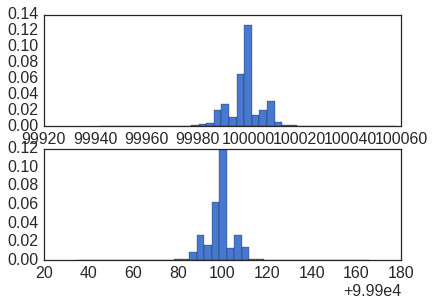

In [143]:
data_sw_ts_diff10 = np.diff(data_sw10[:,1])
data_hw_ts_diff10 = np.diff(data_hw10[:,1])

plt.subplot(2, 1, 1)
plt.hist(data_sw_ts_diff10, bins=40, normed=True)
plt.subplot(2, 1, 2)
plt.hist(data_hw_ts_diff10, bins=40, normed=True)

## tcpdump (1000 pps)

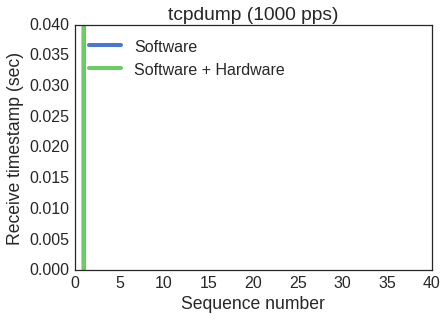

In [144]:
data_sw1000 = np.loadtxt("data/20160218/sume1ms_sw.pcap.txt", delimiter=',')
data_hw1000 = np.loadtxt("data/20160218/sume1ms_hw.pcap.txt", delimiter=',')
# sec -> nanosec
data_sw1000[:,1] *= 1000000
data_hw1000[:,1] *= 1000000

plt.axis([0, 40, 0, 0.04])
plt.plot(data_sw1000[:,0],data_sw1000[:,1])
plt.plot(data_hw1000[:,0],data_hw1000[:,1])
plt.legend(('Software', 'Software + Hardware'), loc='upper left')
plt.xlabel('Sequence number')
plt.ylabel('Receive timestamp (sec)')
plt.title("tcpdump (1000 pps)")

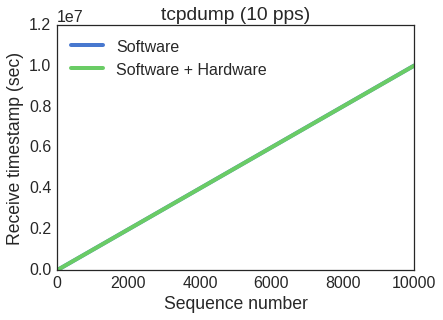

In [145]:
plt.plot(data_sw1000[:,0],data_sw1000[:,1])
plt.plot(data_hw1000[:,0],data_hw1000[:,1])
plt.legend(('Software', 'Software + Hardware'), loc='upper left')
plt.xlabel('Sequence number')
plt.ylabel('Receive timestamp (sec)')
plt.title("tcpdump (10 pps)")

(array([  5.71485720e-05,   5.71485720e-05,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.85742860e-04,
          3.42891432e-04,   5.71485720e-05,   5.71485720e-05,
          2.28594288e-04,   6.28634292e-04,   3.42891432e-04,
          9.71525724e-04,   4.62903433e-03,   3.54321146e-03,
          9.14377152e-04,   1.04010401e-02,   1.52129499e-01,
          3.45748861e-01,   2.91457717e-02,   1.05153372e-02,
          2.34309145e-03,   5.14337148e-03,   1.77160573e-03,
          9.71525724e-04,   0.00000000e+00,   5.71485720e-05,
          1.14297144e-04,   1.14297144e-04,   1.71445716e-04,
          3.42891432e-04,   1.14297144e-04,   5.71485720e-05,
          0.00000000e+00,   0.00000000e+00,   5.71485720e-05,
          5.71485720e-05,   0.00000000e+00,   0.00000000e+00,
          5.71485720e-05]),
 array([  968.  ,   969.75,   971.5 ,   973.25,   975.  ,   976.75,
          978.5 ,   980.25,   982.  ,   983.75,   985.5 ,   987.25,
          989.  ,   990.75,   

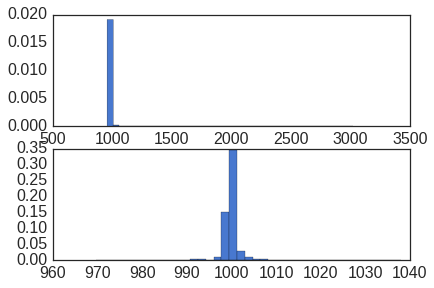

In [146]:
data_sw_ts_diff1000 = np.diff(data_sw1000[:,1])
data_hw_ts_diff1000 = np.diff(data_hw1000[:,1])

plt.subplot(2, 1, 1)
plt.hist(data_sw_ts_diff1000, bins=40, normed=True)
plt.subplot(2, 1, 2)
plt.hist(data_hw_ts_diff1000, bins=40, normed=True)